In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd

target value decrease:  -0.08483732958181597 inexact search iter.number:  9


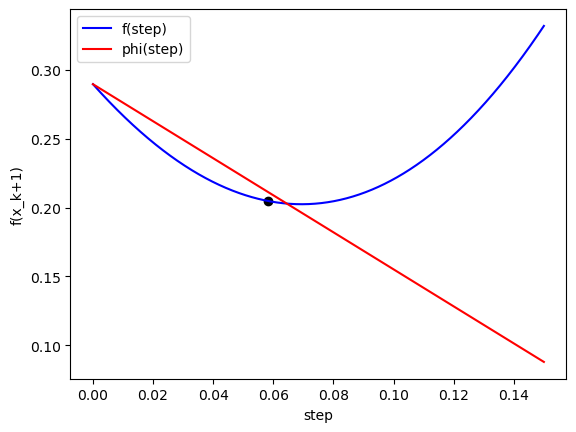

In [2]:
r = np.random.RandomState(42)
d = 10
A = r.random((d,d)) + d*np.identity(d)
b = r.random((d,))
c = r.random()

def f(x):
    return 1/2*A@x@x - b@x + c + (np.sin(b@x))**3

x = np.zeros(d)

g = nd.Gradient(f)(x)
p = -g

desc_norm = g@p

step_upper = 0.15
step = np.linspace(0, step_upper, 1000)

c_1 = 0.55
tau = 0.9

f_k = f(x)

plt.plot(step, list(map(lambda a: f(x + a*p), step)), color = 'blue', label = 'f(step)')
plt.plot(step, list(map(lambda a: f_k + c_1*a*desc_norm, step)), color = 'red', label = 'phi(step)')

step = step_upper
i = 0
while f(x + step*p) > f_k + c_1*step*desc_norm:
    i += 1
    step = tau*step
x = x + step*p
f_upd = f(x)

print('target value decrease: ',f_upd - f_k, 'inexact search iter.number: ', i)

plt.scatter(step, f_upd, color = 'black')
plt.xlabel('step')
plt.ylabel('f(x_k+1)')
plt.legend()
plt.show()